In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

sns.set(color_codes = True)
%matplotlib inline
options.mode.chained_assignment = None

In [ ]:
stores = read_csv('stores+data.csv')
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
sales = read_csv('sales+data.csv')
sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
features = read_csv('features+data.csv')
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Analysing the features dataframe

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
print('Percentage of null values is ',"{:.3f}".format(100*features.isna().sum().sum()/features.size),'%')

Percentage of null values is  24.461 %


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
# Value counts of IsHoliday
features['IsHoliday'].value_counts()

False    7605
True      585
Name: IsHoliday, dtype: int64

In [ ]:
# Converting date into datetime format
features['Date'] = to_datetime(features['Date'])
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Analysing the sales dataframe

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
print('Percentage of null values is ',"{:.3f}".format(100*sales.isna().sum().sum()/sales.size),'%')

Percentage of null values is  0.000 %


In [ ]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Converting date into datetime format and adding new columns for year, month and day
sales['Date'] = to_datetime(sales['Date'])
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month_name()
sales['Day'] = sales['Date'].dt.day_name()

sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day
0,1,1,2010-05-02,24924.50,False,2010,May,Sunday
1,1,1,2010-12-02,46039.49,True,2010,December,Thursday
2,1,1,2010-02-19,41595.55,False,2010,February,Friday
3,1,1,2010-02-26,19403.54,False,2010,February,Friday
4,1,1,2010-05-03,21827.90,False,2010,May,Monday


Month
April        15638.149799
August       16012.023938
December     18342.245834
February     16026.823127
January      14503.308110
July         15563.149206
June         16258.141930
March        15631.676728
May          15850.122787
November     17271.744814
October      15728.044488
September    15378.844836
Name: Weekly_Sales, dtype: float64


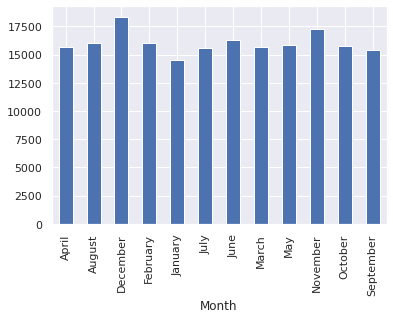

In [ ]:
# Weekly sales trend by month
print(sales.groupby('Month')['Weekly_Sales'].mean())
sales.groupby('Month')['Weekly_Sales'].mean().plot.bar()

Day
Friday       15853.395696
Monday       16512.368691
Saturday     16009.901017
Sunday       16111.223090
Thursday     16146.358537
Tuesday      16412.654937
Wednesday    15748.737228
Name: Weekly_Sales, dtype: float64


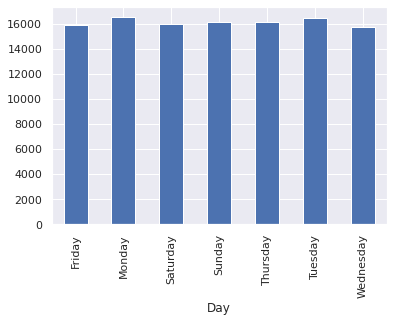

In [ ]:
# Weekly sales trend by day
print(sales.groupby('Day')['Weekly_Sales'].mean())
sales.groupby('Day')['Weekly_Sales'].mean().plot.bar()

# Analysing the stores dataframe

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
print('Percentage of null values is ',"{:.3f}".format(100*stores.isna().sum().sum()/stores.size),'%')

Percentage of null values is  0.000 %


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


# Data preparation

In [ ]:
#Merging sales and stores dataframe
df = merge(sales,stores,on='Store',how='left')
df.shape

(421570, 10)

In [ ]:
#Merge features into the above dataframe
df = merge(df,features,on=['Store','Date','IsHoliday'])
print(df.shape)

# Converting all column names to lowercase for uniformity
df.columns = df.columns.str.lower()
df.head(5)

(421570, 19)


,store,dept,date,weekly_sales,isholiday,year,month,day,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
0,1,1,2010-05-02,24924.50,False,2010,May,Sunday,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,2010,May,Sunday,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,2010,May,Sunday,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,2010,May,Sunday,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,2010,May,Sunday,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
# Dropping all null values in markdown columns
df.dropna(axis=0,subset=['markdown1','markdown2','markdown3','markdown4','markdown5'],inplace=True)
df.shape

(97056, 19)

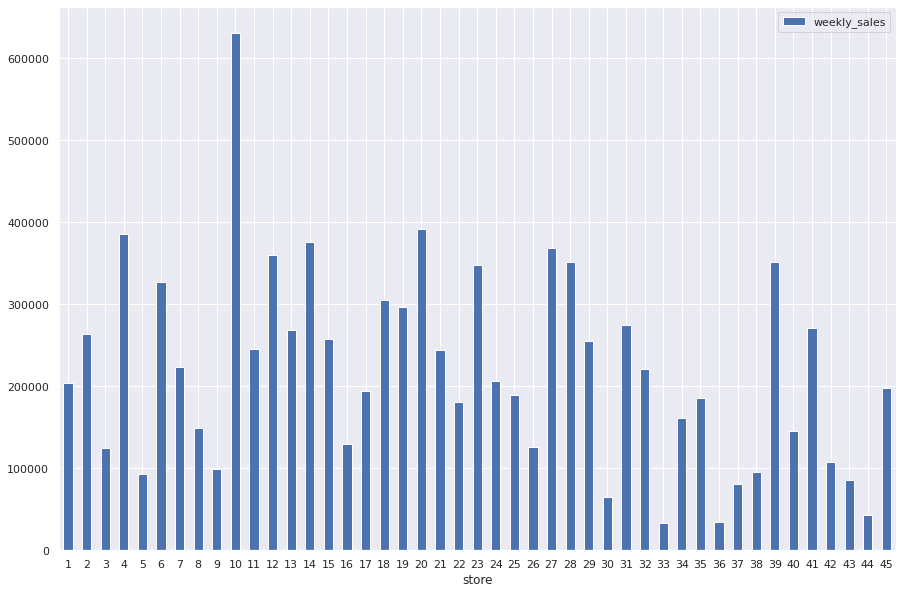

In [ ]:
# Maximum sales by each store
df.groupby('store', as_index=False)['weekly_sales'].max().plot.bar(x='store',y='weekly_sales',figsize=(15,10),rot=0)

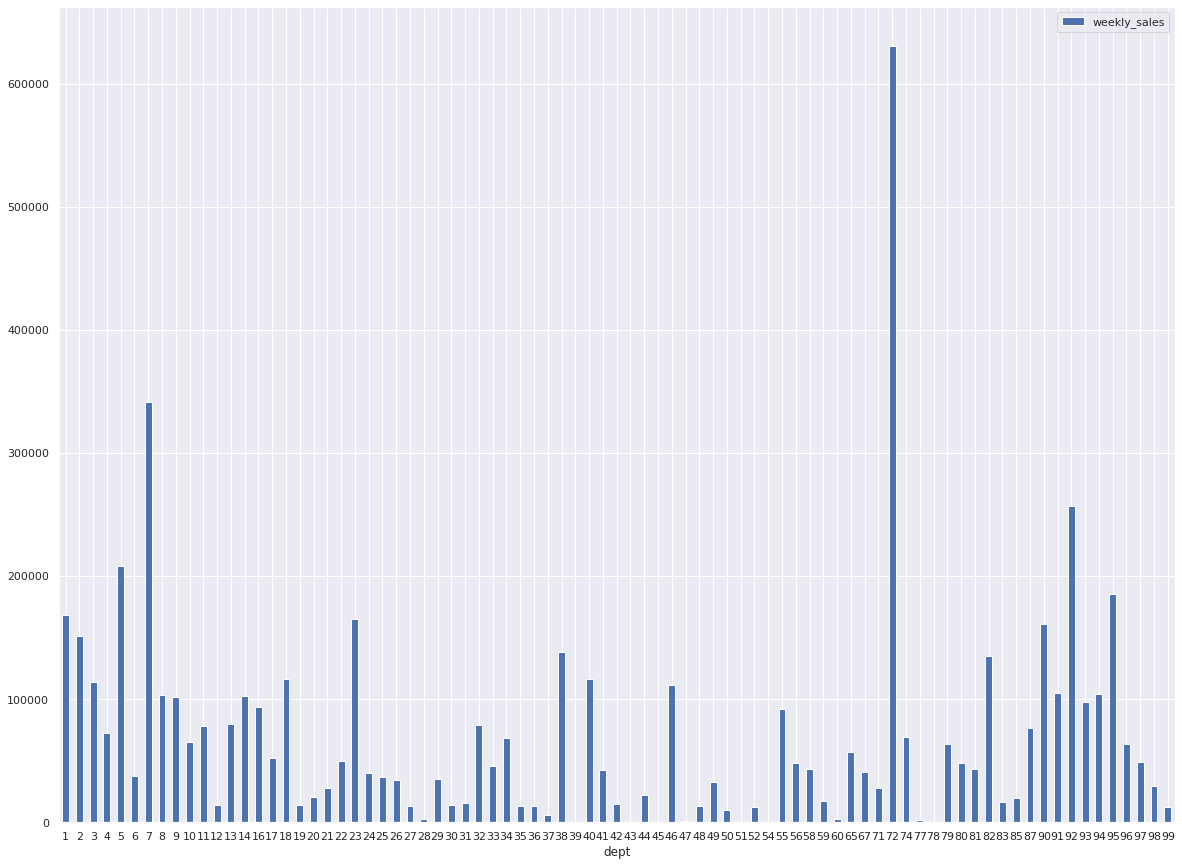

In [ ]:
# Maximum sales by each dept
df.groupby('dept', as_index=False)['weekly_sales'].max().plot.bar(x='dept',y='weekly_sales',figsize=(20,15),rot=0)


In [ ]:
# Converting month and day to number form and creating Dummy Variables for object types
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.weekday
df['isholiday'] = LabelEncoder().fit_transform(df['isholiday'])
df = get_dummies(df,columns=['type'],prefix=['type'])
df.head(5)

,store,dept,date,weekly_sales,isholiday,year,month,day,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type_A,type_B,type_C
6587,1,1,2011-11-11,18689.54,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
6588,1,2,2011-11-11,44936.47,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
6589,1,3,2011-11-11,9959.64,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
6590,1,4,2011-11-11,36826.52,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0
6591,1,5,2011-11-11,31002.65,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0,0


In [ ]:
# Dropping irrelevant features
df.drop(columns=['date','type_C'],inplace=True)
df.head(5)

,store,dept,weekly_sales,isholiday,year,month,day,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type_A,type_B
6587,1,1,18689.54,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0
6588,1,2,44936.47,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0
6589,1,3,9959.64,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0
6590,1,4,36826.52,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0
6591,1,5,31002.65,0,2011,11,4,151315,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,1,0


In [ ]:
# Removing instances where weekly sales < 100
df = df[df['weekly_sales'] > 100]
df.shape

(93071, 19)

In [ ]:
# Splitting the variables into independent X and dependent y sets
X = df.drop(columns='weekly_sales')
y = df['weekly_sales']
print('shape of X: ',X.shape,'\nshape of y: ',y.shape)

shape of X:  (93071, 18) 
shape of y:  (93071,)


In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X_train: ',X_train.shape,'\nshape of y_train: ',y_train.shape)
print('shape of X_test: ',X_test.shape,'\nshape of y_test: ',y_test.shape)

shape of X_train:  (74456, 18) 
shape of y_train:  (74456,)
shape of X_test:  (18615, 18) 
shape of y_test:  (18615,)


In [ ]:
# Standardizing the X data using StandardScaler()
scl = StandardScaler().fit(X_train)
X_train = DataFrame(scl.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test = DataFrame(scl.transform(X_test),columns=X_test.columns,index=X_test.index)

# Model Training and Evaluation

In [ ]:
# Creating a deep neural network
dnn = Sequential()
# Input layer
dnn.add(Dense(activation='relu',input_dim=18,units=10,kernel_initializer='uniform'))
# Hidden layers
dnn.add(Dense(10,activation='relu',kernel_initializer='uniform'))
dnn.add(Dense(10,activation='relu',kernel_initializer='uniform'))
dnn.add(Dense(6,activation='relu',kernel_initializer='uniform'))
dnn.add(Dense(6,activation='relu',kernel_initializer='uniform'))
# Output layer
dnn.add(Dense(1,kernel_initializer='uniform'))

In [ ]:
# Compiling the model
dnn.compile(optimizer='adam',loss='mse',metrics=['mae'])
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 525
Trainable params: 525
Non-trainable params: 0
__________________________________________________________

In [ ]:
# Model Training
dnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
1164/1164 [==============================] - 3s 2ms/step - loss: 708555776.0000 - mae: 16671.3281 - val_loss: 565604800.0000 - val_mae: 15928.7148
Epoch 2/100
1164/1164 [==============================] - 2s 2ms/step - loss: 568242496.0000 - mae: 16162.6582 - val_loss: 557354688.0000 - val_mae: 16048.3447
Epoch 3/100
1164/1164 [==============================] - 2s 2ms/step - loss: 560837056.0000 - mae: 16099.8525 - val_loss: 551786368.0000 - val_mae: 15928.3262
Epoch 4/100
1164/1164 [==============================] - 2s 2ms/step - loss: 554747200.0000 - mae: 16027.0898 - val_loss: 546160256.0000 - val_mae: 15733.2783
Epoch 5/100
1164/1164 [==============================] - 2s 2ms/step - loss: 548758400.0000 - mae: 15917.9814 - val_loss: 539212480.0000 - val_mae: 15713.9629
Epoch 6/100
1164/1164 [==============================] - 2s 2ms/step - loss: 537647936.0000 - mae: 15723.7490 - val_loss: 525940416.0000 - val_mae: 15360.9072
Epoch 7/100
1164/1164 [=======================

In [ ]:
# Trying Dropout and Batch normalization:
# Creating a deep neural network
dnn = Sequential()
# Input layer
dnn.add(Dense(activation='relu',input_dim=18,units=10,kernel_initializer='uniform'))
# Hidden layers
dnn.add(Dense(10,activation='relu',kernel_initializer='uniform'))
dnn.add(Dropout(0.1))
dnn.add(Dense(10,activation='relu',kernel_initializer='uniform'))
dnn.add(BatchNormalization())
dnn.add(Dense(6,activation='relu',kernel_initializer='uniform'))
dnn.add(Dense(6,activation='relu',kernel_initializer='uniform'))
# Output layer
dnn.add(Dense(1,kernel_initializer='uniform'))

In [ ]:
# Compiling the model
dnn.compile(optimizer='adam',loss='mse',metrics=['mae'])
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                190       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                

In [ ]:
# Model Training
dnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
1164/1164 [==============================] - 3s 2ms/step - loss: 920449664.0000 - mae: 17742.2559 - val_loss: 750274944.0000 - val_mae: 15087.5469
Epoch 2/100
1164/1164 [==============================] - 2s 2ms/step - loss: 532218464.0000 - mae: 13436.8672 - val_loss: 460160576.0000 - val_mae: 13620.2383
Epoch 3/100
1164/1164 [==============================] - 2s 2ms/step - loss: 476287552.0000 - mae: 13731.8594 - val_loss: 457382784.0000 - val_mae: 13450.6035
Epoch 4/100
1164/1164 [==============================] - 2s 2ms/step - loss: 472794336.0000 - mae: 13721.2197 - val_loss: 456611200.0000 - val_mae: 13688.0645
Epoch 5/100
1164/1164 [==============================] - 2s 2ms/step - loss: 470283200.0000 - mae: 13724.6797 - val_loss: 453422848.0000 - val_mae: 13517.2080
Epoch 6/100
1164/1164 [==============================] - 2s 2ms/step - loss: 468120736.0000 - mae: 13688.1914 - val_loss: 449775424.0000 - val_mae: 13654.3896
Epoch 7/100
1164/1164 [=======================